In [1]:
# imports

import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'sklearn'

In [29]:
import matplotlib.pyplot as plt 

%matplotlib inline

### Import Data

In [2]:
flowers = pd.read_csv('./iris-data.csv')
flowers

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Numerical features

In [4]:
flowers.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

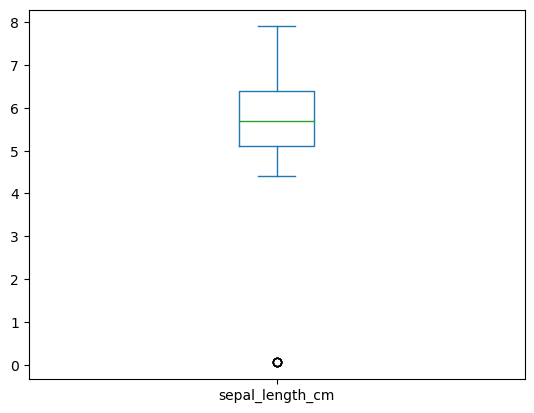

In [32]:
flowers['sepal_length_cm'].plot.box()

In [9]:
# missing values

flowers.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [16]:
# Showing NaN values

c

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [10]:
# missing values percentage function

def missing_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df

In [11]:
# missing values percentage

missing_percentage(flowers)

,column_name,percent_missing
sepal_length_cm,sepal_length_cm,0.000000
sepal_width_cm,sepal_width_cm,0.000000
petal_length_cm,petal_length_cm,0.000000
petal_width_cm,petal_width_cm,3.333333
class,class,0.000000


In [12]:
# We have 3 options:
# - Add values to that NAN cells
# - Delete rows
# - Delete column

# I will chose to fill the NAN values with the mean, because the rest of the features are 1 std from their means(more or less)

### Using Pandas

In [20]:
# we make a copy

flowers_input_pd = flowers.copy()
flowers_input_pd

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
flowers_input_pd['petal_width_cm'] = flowers_input_pd['petal_width_cm'].fillna(flowers_input_pd['petal_width_cm'].mean())
missing_percentage(flowers_input_pd)

,column_name,percent_missing
sepal_length_cm,sepal_length_cm,0.0
sepal_width_cm,sepal_width_cm,0.0
petal_length_cm,petal_length_cm,0.0
petal_width_cm,petal_width_cm,0.0
class,class,0.0


### Using Sklearn

In [22]:
# Now we do the same but using Sklearn
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

In [23]:
flowers_input_sk = flowers.copy()

In [24]:
imputer = imputer.fit(flowers_input_sk[['petal_width_cm']])
imputer.get_params(deep=True)

{'add_indicator': False,
 'copy': True,
 'fill_value': None,
 'missing_values': nan,
 'strategy': 'mean',
 'verbose': 'deprecated'}

In [25]:
flowers_input_sk['petal_width_cm'] = imputer.transform(flowers_input_sk[['petal_width_cm']])
missing_percentage(flowers_input_sk)

,column_name,percent_missing
sepal_length_cm,sepal_length_cm,0.0
sepal_width_cm,sepal_width_cm,0.0
petal_length_cm,petal_length_cm,0.0
petal_width_cm,petal_width_cm,0.0
class,class,0.0


In [8]:
flowers['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)